# Uso nativo (qpu real)

- Cargar 

`from qmiotools.integrations.qiskitqmio.qmiobackend import QmioBackend`

# Simulador 
- Tenemos que engañar a Python para que crea que existe un server como el que se usa para interactuar con la máquina 

`import os`

`os.environ["ZMQ_SERVER"] = "tcp://127.0.0.1:5556"`

- Después de poner esto, podemos cargar el backend del simulador:
`from qmiotools.integrations.qiskitqmio.fakeqmio import FakeQmio`

- Necesitamos un fichero de calibraciones para que se pueda construir el modelo de ruido de qiskitAer 
`backend = FakeQmio(path_to_calibration_file)`




In [2]:
import os

import numpy as np

os.environ["ZMQ_SERVER"] = "tcp://127.0.0.1:5556"
# from qmiotools.integrations.qiskitqmio.qmiobackend import QmioBackend # <- if you use the real hardware
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import HGate, XGate
from qmiotools.integrations.qiskitqmio.fakeqmio import FakeQmio


backend = FakeQmio()  # when using the real hardware, we will use QmioBackend


Importing calibrations from  ./2025_04_23__12_00_02.json


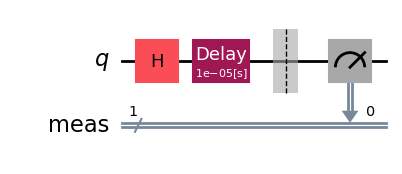

In [10]:
qc = QuantumCircuit(1) 
qc.h(0)
qc.delay(duration=1e-5, unit='s')
qc.measure_all() 
display(qc.draw('mpl'))


Tenemos que transpilar el circuito para adaptarlo a las características de la qpu real, como las puertas nativas, los tiempos de medición, etc. 

Con `initial_layout`, asignamos el mapeo entre los qubits de qiskit con los que se van a usar en el ordenador. En nuestro ejemplo, elegimos el qubit 5.

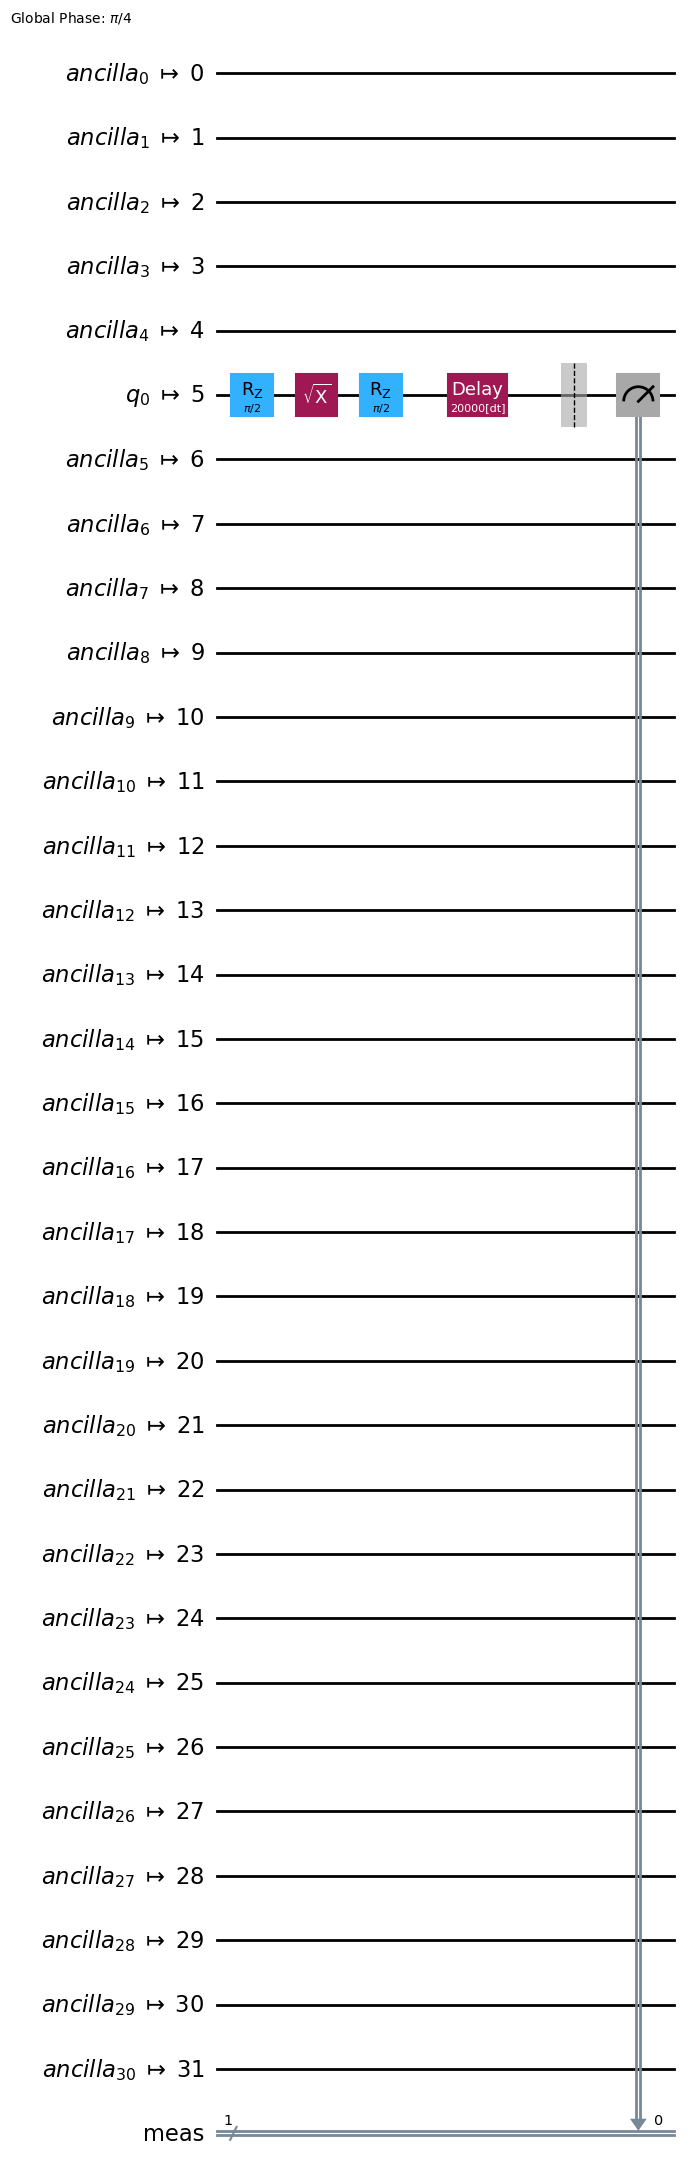

In [49]:
qubit_id = 5
qc_transpiled = transpile(qc, backend=backend, initial_layout=[qubit_id], optimization_level=2, scheduling_method=None)
qc_transpiled.draw('mpl')


## Visualización de circuitos 
Os recomiendo usar estas herramientas del módulo `qiskit.visualization.timeline` para que inspeccionéis qué circuitos se ejecutan. 

[Info aquí](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.timeline_drawer)

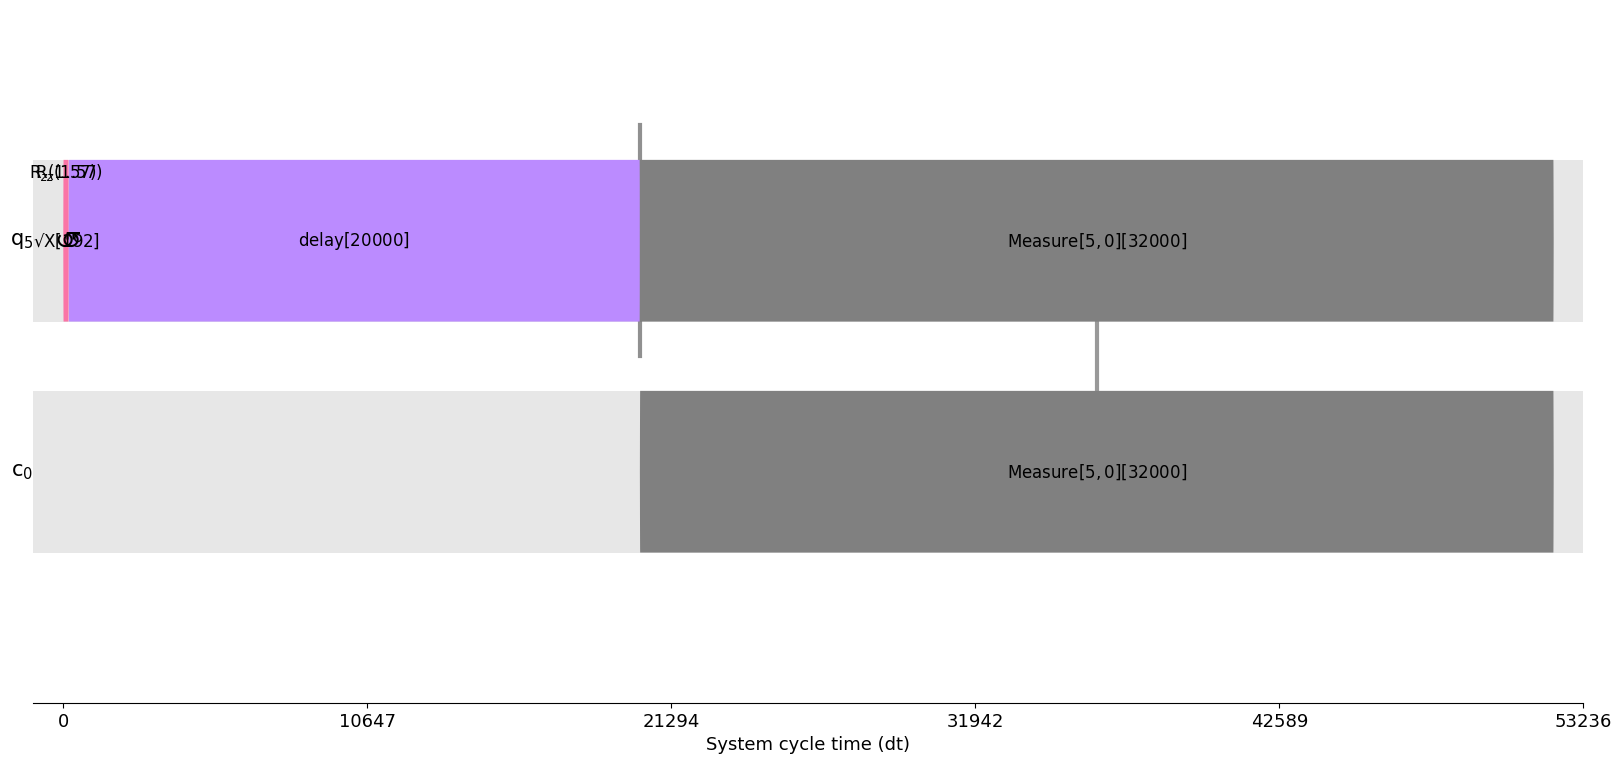

In [18]:
from qiskit.visualization.timeline import IQXDebugging, IQXSimple, IQXStandard, draw

my_style = {
    'formatter.general.fig_width': 20,
    'formatter.general.fig_unit_height': 3,
    'formatter.box_height.gate': 0.7,
    'formatter.box_height.timeslot':0.7

}
style = IQXDebugging(**my_style)
# draw(qc_transpiled, style=IQXDebugging(), idle_wires=False)
draw(qc_transpiled, style=style, idle_wires=False)

# Lanzar trabajos 

In [48]:
n_shots = 1000
job = backend.run(
        qc_transpiled, shots=int(n_shots), output_qasm3=True
    ) # <- Importante usar output_qasm3
result = job.result()
counts = result.get_counts()

print(counts)

{'0': 590, '1': 410}
